## Plot profiles from HeFESTO & Perplex outputs

In this cookbook, the profile outputs from HeFESTO is plotted. THe outpus must be generated with a single T / S and depth-varing pressures.

In [1]:
import os, sys
import numpy as np
from shutil import rmtree, copy
from matplotlib import pyplot as plt
from matplotlib import gridspec, cm

# directory to the aspect Lab
ASPECT_LAB_DIR = os.environ['ASPECT_LAB_DIR']
RESULT_DIR = os.path.join(ASPECT_LAB_DIR, 'results')

sys.path.append(os.path.join(ASPECT_LAB_DIR))
# import shilofue.PlotDepthAverage as PDAver
# import shilofue.FlowLaws as FlowLaws
# import shilofue.ParsePrm as ParsePrm
# import shilofue.ThermalModel as TModel
# import shilofue.Rheology as Rheology
import shilofue.PostHefesto as PostHefesto

# import utilities in subdirectiory
sys.path.append(os.path.join(ASPECT_LAB_DIR, 'utilities', "python_scripts"))
import Utilities


Bad key "xtick.minor.ndivs" on line 498 in
/home/lochy/.config/matplotlib/stylelib/publication_lhy11009.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.minor.ndivs" on line 521 in
/home/lochy/.config/matplotlib/stylelib/publication_lhy11009.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
fort56_path = "/home/lochy/Softwares/HeFESTo/HeFESToRepository/output_2.0249999999999124/fort.56"
field = "Isobaric_heat_capacity"
x_lim = [1.0 , 2.0]
o_dir = Utilities.var_subs("${ASPECT_LAB_DIR}/results/HeFESTo_profile")
if not os.path.isdir(o_dir):
    os.mkdir(o_dir)

LookupTable = PostHefesto.LOOKUP_TABLE()
LookupTable.ReadRawFort56(fort56_path)
depths_0, Ts_0 = LookupTable.export_temperature_profile()
_, densities_0 = LookupTable.export_density_profile()
_, data_0 = LookupTable.export_field_profile(field)

fig, ax = plt.subplots()
ax.plot(data_0, depths_0, "--", label="HeFesto %s" % field, color="tab:red")
ax.set_xlim(x_lim)
ax.set_ylabel("Depth [km]")
ax.set_xlabel(field)
ax.legend()
ax.invert_yaxis()

o_path = os.path.join(o_dir, "%s_%.2f_%.2f.pdf" % (field, x_lim[0], x_lim[1]))
fig.savefig(o_path)
print("generate figure %s" % o_path)

plt.close()

ReadRawFort56: reading file


AssertionError: 

#### Plot profile I got from Gabe Epstein

In the next block, I plot the output of Garnet fraction of a NMORB composition from PerPle_X.
Gabe sent me the files in 11-2023.
I use the pcolormesh to color-mesh the garnet fraction and then plot a couple coutours on top.

Read information of the 1st dimension
Dimention 1 has 250 entries
Checking data
Everything is all right of this file
['Temperature', 'Pressure', 'Density', 'H2O', 'cAmph_G', 'Ep_HP11', 'law', 'Omph_GHP', 'Gt_HGP']
Read information of the 1st dimension
Dimention 1 has 250 entries
Checking data
Everything is all right of this file


Text(0, 0.5, 'P (GPa)')

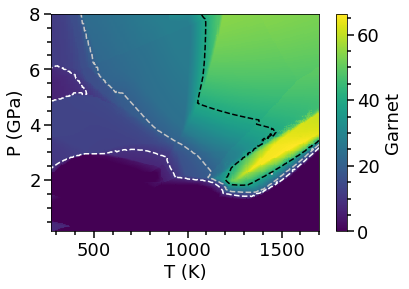

In [2]:
plt.style.use('publication_lhy11009')

perplex_path = "/home/lochy/Desktop/shared/morb_green_finev3_7.tab"
assert(os.path.isfile(perplex_path))

LookupTable = PostHefesto.LOOKUP_TABLE()
LookupTable.ReadPerplex(perplex_path, header_rows=13)
LookupTable.Update()
print(LookupTable.AllFields())
LookupTable.fix_field_nan_value("Gt_HGP", 0.0)
Ts, Ps, Gt_HGPs = LookupTable.export_field_mesh("Gt_HGP")
# Ts = LookupTable.export_field('Temperature')
# Ps = LookupTable.export_field('Pressure')
# Gt_HGPs = LookupTable.export_field('Gt_HGP')

fig, ax = plt.subplots()
h = ax.pcolormesh(Ts, Ps/1e4, Gt_HGPs)
ax.contour(Ts, Ps/1e4, Gt_HGPs, (10, 20, 40), cmap="Greys", linestyles="dashed")
fig.colorbar(h, ax=ax, label="Garnet")
ax.set_xlabel("T (K)")
ax.set_ylabel("P (GPa)")

fig_path = os.path.join(RESULT_DIR, "Perple_X_morb_garnet.pdf")
fig.savefig(fig_path)
print("Figure saved: %s" % fig_path)

In [6]:
from matplotlib import rcParams, get_configdir
# rcParams.keys()

get_configdir()

'/home/lochy/.config/matplotlib'